# Where is Wally?
## Tutorial 2, Exercise 1


Using numpy, matplotlib and scipy
Application of filtering and correlation.
Your task is to get familiar with fundamental image processing techniques,
namely:

    1. Gaussian filtering
    2. Derivative of an image
    3. Cross-correlation of two images

The goal is to find Wally on the beach.

You need to replace the ??? in the code with the required commands

In [1]:
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt

Load the images 'beach.png' and 'wally.png' into numpy arrays using imread.

In [2]:
beach = plt.imread("beach.png")
wally = plt.imread("wally.png")

Have a look at them using imshow. The first figure should depict the whole
beach and the second one is an image of Wally.

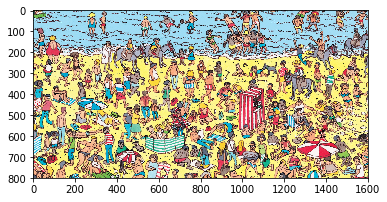

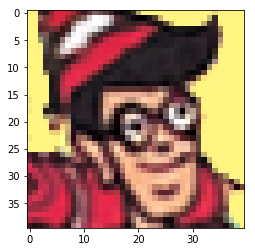

In [3]:
plt.figure(1)
plt.imshow(beach, interpolation='none')

plt.figure(2)
plt.imshow(wally, interpolation='none')

For both images average over all color channels to come up with gray-scale
images that will be used in the following. In addition make sure to normalize
the two images identically. Take care that the datatype of the resulting
numpy arrays is a floating-point datatype.

(800, 1600)


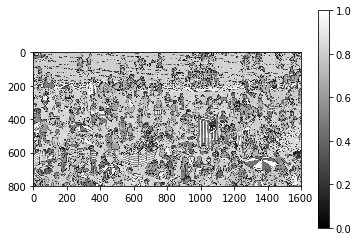

In [4]:
beach_gray = np.mean(beach,axis=2)
beach_gray = (beach_gray[:] - np.min(beach_gray))/(np.max(beach_gray)-np.min(beach_gray))
wally_gray = np.mean(wally,axis=2)
wally_gray = (wally_gray[:] - np.min(wally_gray))/(np.max(wally_gray)-np.min(wally_gray))
print(beach_gray.shape)
plt.figure(3)
plt.imshow(beach_gray, cmap='gray', interpolation='none')
plt.colorbar()


If you look closely at the images, you will see some noise. We want to
remove the noise by applying a Gaussian filter. For the image of the beach
we will explicitly calculate the kernel of the Gaussian filter and then
perform a convolution using the nd.convolve function of scipy.ndimage.
For the image of Wally, we use the function nd.filters.gaussian_filter
that should do exactly the same. If you like you can also use this function
to check if the weights you have calculated are correct.

For calculating the Gaussian filter, we need coordinates. Therefore generate
x and y coordinates that go from -4 to 4 in steps of one using the
np.linspace function. Take care to include the endpoint.

In [5]:
y = np.linspace(-4,4,9)
x = np.linspace(-4,4,9)

Next, we generate a two-dimensional grid of coordinates that can then be used
to calculate the Gaussian weights.

In [6]:
yy, xx = np.meshgrid(y, x, indexing='ij')

Calculate the Gaussian weights. Be sure that they are normalized to one. Use
the coordinate grid defined above. Use a sigma of 1.

In [7]:
kernel_gauss = np.exp(-0.5*(np.square(yy) + np.square(xx))) / np.sqrt(2*np.pi)
kernel_gauss = kernel_gauss / np.sum(kernel_gauss)

Perform the actual convolution using the nd.convolve function with the
weights you have created and the nd.filters.gaussian_filter function
for the image of Wally.

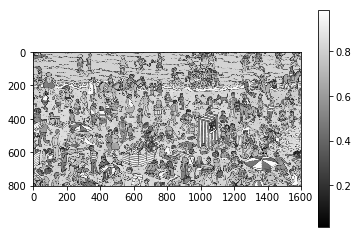

In [8]:
beach_smoothed = nd.convolve(beach_gray, kernel_gauss)
wally_smoothed = nd.filters.gaussian_filter(wally_gray,1)

plt.figure(4)
plt.imshow(beach_smoothed, cmap='gray', interpolation='none')
plt.colorbar()


Apply a Laplace filter to the images to get the edges of the images.
Use the nd.convolve function and define the derivative kernel by hand. If you
like, you can check if the results coincide with what you would get if you
apply nd.filters.laplace that we will also apply to the image of Wally.


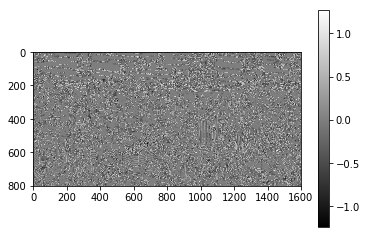

In [9]:
kernel_laplace = np.array([[1,1,1],[1,-8,1],[1,1,1]])

beach_edges = nd.convolve(beach_smoothed, kernel_laplace)
wally_edges = nd.filters.laplace(wally_smoothed)

plt.figure(5)
plt.imshow(beach_edges, cmap='gray', interpolation='none')
plt.colorbar()


 Finally apply the cross correlation function onto these images. Therefore use
the function nd.correlate and look up the arguments. I actually wanted you to
implement this by yourself, but it takes an insane amount of computing power
 to explicitely calculate the cross-correlation of those two images. You will
 soon learn how you can utilize the Fourier space to solve this problem.

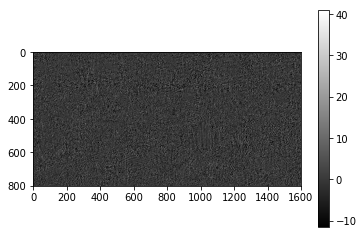

In [10]:
correlation = nd.correlate(beach_edges,wally_edges)

plt.figure(6)
plt.imshow(correlation, cmap='gray', interpolation='none')
plt.colorbar()

Extract the position of the maxiumum of the correlation matrix. This
indicates where we can find Wally. Therefore use the method argmax on the correlation array.

In [11]:
index = correlation.argmax()

As you might have checked the position of the maximum is a single value. This
is due to the fact that all pixels are counted subsequently. To transform
this value back into two coordinates use the function np.unravel_index and
check its arguments.

In [12]:
shape = beach_edges.shape
sh = np.unravel_index(index,shape)
sh

(488, 693)

The shift parameter should now point directly onto Wally. Finally, crop
Wally out of the beach array by using the shift parameter and the shape
of the array containing Wally.

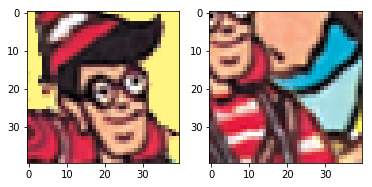

In [13]:
cs = wally.shape
x = sh[0]+cs[0]
y = sh[1]+cs[1]
beach_cropped = beach[sh[0]:x,sh[1]:y]

plt.figure(7)
plt.subplot(121)
plt.imshow(wally, interpolation='none')
plt.subplot(122)
plt.imshow(beach_cropped, interpolation='none')